In [1]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#read URL file and assign it to a dataframe 'df'
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

df = pd.read_csv(url, header = None)

## DATA WRANGLING

In [2]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
#create header list
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df.columns = headers


In [4]:
#remove the missing the values. First replace '?' with 'NaN'
df = df.replace('?', np.NaN)

df.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN


In [5]:
#Use 'dropna' to remove the rows with 'Nan' in 'price' column
df=df.dropna(subset =['price'], axis = 0)
df.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [6]:
#writes object to a csv file or to convert df to csv and save it to a file

df.to_csv("C:\\Users\\okolo\\Downloads\\automobile.csv", index = False)

In [7]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [8]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [9]:
df.describe(include ='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,164,201,201,201,199,201,201,201,201.000000,...,201.000000,201,197,197,201.000000,199,199,201.000000,201.000000,201
unique,NaN,51,22,2,2,2,5,3,2,NaN,...,NaN,8,38,36,NaN,58,22,NaN,NaN,186
top,NaN,161,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,16500
freq,NaN,11,32,181,165,113,94,118,198,NaN,...,NaN,92,23,19,NaN,19,36,NaN,NaN,2
mean,0.840796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.797015,...,126.875622,NaN,NaN,NaN,10.164279,NaN,NaN,25.179104,30.686567,NaN
std,1.254802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.066366,...,41.546834,NaN,NaN,NaN,4.004965,NaN,NaN,6.423220,6.815150,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,98.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [10]:
df[['length', 'compression-ratio']].describe()

,length,compression-ratio
count,201.000000,201.000000
mean,174.200995,10.164279
std,12.322175,4.004965
min,141.100000,7.000000
25%,166.800000,8.600000
50%,173.200000,9.000000
75%,183.500000,9.400000
max,208.100000,23.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [12]:
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print(' ')
    

symboling
False    201
Name: symboling, dtype: int64
 
normalized-losses
False    164
True      37
Name: normalized-losses, dtype: int64
 
make
False    201
Name: make, dtype: int64
 
fuel-type
False    201
Name: fuel-type, dtype: int64
 
aspiration
False    201
Name: aspiration, dtype: int64
 
num-of-doors
False    199
True       2
Name: num-of-doors, dtype: int64
 
body-style
False    201
Name: body-style, dtype: int64
 
drive-wheels
False    201
Name: drive-wheels, dtype: int64
 
engine-location
False    201
Name: engine-location, dtype: int64
 
wheel-base
False    201
Name: wheel-base, dtype: int64
 
length
False    201
Name: length, dtype: int64
 
width
False    201
Name: width, dtype: int64
 
height
False    201
Name: height, dtype: int64
 
curb-weight
False    201
Name: curb-weight, dtype: int64
 
engine-type
False    201
Name: engine-type, dtype: int64
 
num-of-cylinders
False    201
Name: num-of-cylinders, dtype: int64
 
engine-size
False    201
Name: engine-size, dtype: int64

In [13]:
df.isnull()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
df[['body-style']].describe()

,body-style
count,201
unique,5
top,sedan
freq,94


In [15]:
#replace 'nan' with mean value in 'normalized lossess'

df[['normalized-losses']] = df[['normalized-losses']].astype('float')

avg_norm_loss = df[['normalized-losses']].mean(axis = 0)

df[['normalized-losses']] = df[['normalized-losses']].replace(np.nan, avg_norm_loss)


In [16]:
#replace 'nan' with the most frequent value in num-of-doors

df['num-of-doors'].value_counts()

df['num-of-doors'].replace(np.nan, 'four', inplace = True)

In [17]:
#replace 'nan' with mean value in stroke

df['stroke'] = df['stroke'].astype('float')
avg_stroke = df['stroke'].mean(axis =0)
df['stroke'].replace(np.nan, avg_stroke, inplace= True)

In [18]:
#replace 'nan' with mean value in bore

df[['bore']] = df[['bore']].astype('float')

avg_bore = df['bore'].mean(axis=0)

df['bore'].replace(np.nan, avg_bore, inplace=True)


In [19]:
#replace 'nan' with mean value in horsepower

df['horsepower'] = df[['horsepower']].astype('float')

avg_horse = df['horsepower'].mean(axis=0)

df['horsepower'] = df['horsepower'].replace(np.nan, avg_horse)

In [20]:
#replace 'nan' with mean value of peak-rpm

df['peak-rpm'] =df['peak-rpm'].astype('float')

avg_peak = df['peak-rpm'].mean(axis=0)

df['peak-rpm'].replace(np.nan, avg_peak, inplace=True)

In [21]:
#covert price from 'object' to 'int'

df['price'] = df['price'].astype('float')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

## DATA STANDARDIZATION

In [23]:
#Convert mpg to L/100km by mathematical operation (235 divided by mpg)

df['city-L/100km'] = 235/df['city-mpg']

df['highway-L/100km'] = 235/df['highway-mpg']


In [24]:
#Deleting df['city-mpg'] and df['highway-mpg']
del df['city-mpg']

del df['highway-mpg']

In [25]:
df[['height', 'length', 'width']]

,height,length,width
0,48.8,168.8,64.1
1,48.8,168.8,64.1
2,52.4,171.2,65.5
3,54.3,176.6,66.2
4,54.3,176.6,66.4
...,...,...,...
200,55.5,188.8,68.9
201,55.5,188.8,68.8
202,55.5,188.8,68.9
203,55.5,188.8,68.9


## DATA NORMALIZATION

In [26]:
#Normalize the values of columns 'height', 'length', & 'width' so that the values range from 0 to 1

df['height'] = df['height']/df['height'].max()
df['length'] =df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

In [27]:
df[['height', 'length', 'width']]

,height,length,width
0,0.816054,0.811148,0.890278
1,0.816054,0.811148,0.890278
2,0.876254,0.822681,0.909722
3,0.908027,0.848630,0.919444
4,0.908027,0.848630,0.922222
...,...,...,...
200,0.928094,0.907256,0.956944
201,0.928094,0.907256,0.955556
202,0.928094,0.907256,0.956944
203,0.928094,0.907256,0.956944


## BINNING DATA IN PANDAS

In [28]:
df['horsepower'].value_counts()

68.000000     19
69.000000     10
70.000000      9
116.000000     9
110.000000     8
95.000000      7
88.000000      6
114.000000     6
62.000000      6
101.000000     6
97.000000      5
102.000000     5
82.000000      5
76.000000      5
84.000000      5
145.000000     5
160.000000     5
111.000000     4
92.000000      4
123.000000     4
86.000000      4
207.000000     3
152.000000     3
73.000000      3
121.000000     3
90.000000      3
85.000000      3
182.000000     3
94.000000      2
162.000000     2
155.000000     2
56.000000      2
161.000000     2
156.000000     2
184.000000     2
176.000000     2
112.000000     2
100.000000     2
52.000000      2
103.396985     2
142.000000     1
140.000000     1
175.000000     1
78.000000      1
48.000000      1
134.000000     1
120.000000     1
60.000000      1
64.000000      1
58.000000      1
115.000000     1
106.000000     1
72.000000      1
135.000000     1
262.000000     1
154.000000     1
143.000000     1
55.000000      1
200.000000    

Text(0, 0.5, 'count')

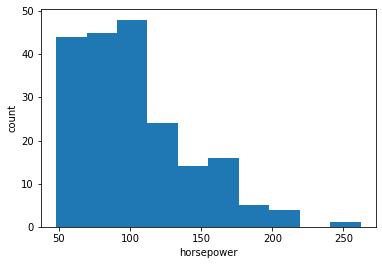

In [29]:
#first, see what the distribution of 'horsepower' look like

df['horsepower'] = df['horsepower'].astype('int', copy = True)

plt.hist(df['horsepower'])

plt.xlabel('horsepower')
plt.ylabel('count')

In [30]:
#build bins: use '4' as divider to create 3 bins of equal lenght

bins = np.linspace(min(df['horsepower']), max(df['horsepower']), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [31]:
#name the bins

bin_names = ['low', 'medium', 'high']

In [32]:
#apply 'cut' functions to determine what each value of 'horsepower' belongs to

df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels =bin_names, include_lowest=True)


df['horsepower-binned'].value_counts()

low       153
medium     43
high        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

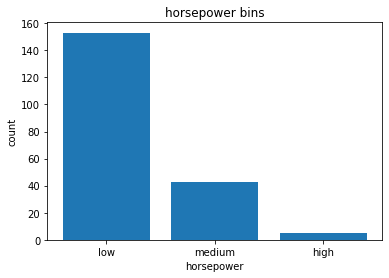

In [33]:
#plot the distribution of each bin

plt.bar(bin_names, df['horsepower-binned'].value_counts())

plt.xlabel('horsepower')
plt.ylabel('count')
plt.title('horsepower bins')

Text(0.5, 1.0, 'horsepower bin')

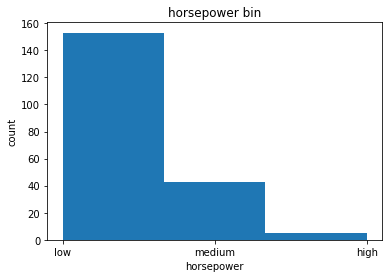

In [34]:
#alternatively, 'plt.hist' can be used for visualizing bin distrubution

plt.hist(df['horsepower-binned'] , bins = 3)

plt.xlabel('horsepower')
plt.ylabel('count')
plt.title('horsepower bin')

In [35]:
df['fuel-type'].value_counts()

gas       181
diesel     20
Name: fuel-type, dtype: int64

## INDICATOR VARIABLE ( OR DUMMY VARIABLE)

In [36]:
#assign numerical variables (dummy variables) to the different categories in 'fuel-type'

dummy_variable_1 = pd.get_dummies(df['fuel-type'])

dummy_variable_1

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


In [37]:
#rename columns for clarity

dummy_variable_1.columns = ['fuel-type-diesel', 'fuel-type-gas']

dummy_variable_1

#alternatively:
#dummy_variable_1.rename(columns={'diesel' : 'fuel-type-diesel', 'gas' : 'fuel-type-gas'}, inplace = True)

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


In [38]:
#merge 'df' and 'dummy_variable_1'

#df['dummy_variable_1'] = dummy_variable_1

df = pd.concat([df, dummy_variable_1], axis = 1)

df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000.0,13495.0,11.190476,8.703704,low,0,1
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000.0,16500.0,11.190476,8.703704,low,0,1
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000.0,16500.0,12.368421,9.038462,medium,0,1
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500.0,13950.0,9.791667,7.833333,low,0,1
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500.0,17450.0,13.055556,10.681818,low,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.15,9.5,114,5400.0,16845.0,10.217391,8.392857,low,0,1
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,3.15,8.7,160,5300.0,19045.0,12.368421,9.400000,medium,0,1
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,2.87,8.8,134,5500.0,21485.0,13.055556,10.217391,medium,0,1
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,3.40,23.0,106,4800.0,22470.0,9.038462,8.703704,low,1,0


In [39]:
#drop original column 'fuel-type'

df.drop('fuel-type', axis =1, inplace = True)

df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,13495.0,11.190476,8.703704,low,0,1
1,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,16500.0,11.190476,8.703704,low,0,1
2,1,122.0,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154,5000.0,16500.0,12.368421,9.038462,medium,0,1
3,2,164.0,audi,std,four,sedan,fwd,front,99.8,0.848630,...,3.40,10.0,102,5500.0,13950.0,9.791667,7.833333,low,0,1
4,2,164.0,audi,std,four,sedan,4wd,front,99.4,0.848630,...,3.40,8.0,115,5500.0,17450.0,13.055556,10.681818,low,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,3.15,9.5,114,5400.0,16845.0,10.217391,8.392857,low,0,1
201,-1,95.0,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,3.15,8.7,160,5300.0,19045.0,12.368421,9.400000,medium,0,1
202,-1,95.0,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,2.87,8.8,134,5500.0,21485.0,13.055556,10.217391,medium,0,1
203,-1,95.0,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,3.40,23.0,106,4800.0,22470.0,9.038462,8.703704,low,1,0


In [40]:
df['aspiration'].value_counts()

std      165
turbo     36
Name: aspiration, dtype: int64

In [41]:
#create an indicator (dummy) variable for "df['aspirations']"

dummy_variable_2 = pd.get_dummies(df['aspiration'])

dummy_variable_2


,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
200,1,0
201,0,1
202,1,0
203,0,1


In [42]:
#rename columns

dummy_variable_2.rename(columns = {'std':'aspiration-type-std', 'turbo':'aspiration-type-turbo'}, inplace=True)

dummy_variable_2

,aspiration-type-std,aspiration-type-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
200,1,0
201,0,1
202,1,0
203,0,1


In [43]:
#merger 'df' and 'dummy_variable_2'

df = pd.concat([df, dummy_variable_2], axis =1)

df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-type-std,aspiration-type-turbo
0,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,13495.0,11.190476,8.703704,low,0,1,1,0
1,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,16500.0,11.190476,8.703704,low,0,1,1,0
2,1,122.0,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,154,5000.0,16500.0,12.368421,9.038462,medium,0,1,1,0
3,2,164.0,audi,std,four,sedan,fwd,front,99.8,0.848630,...,102,5500.0,13950.0,9.791667,7.833333,low,0,1,1,0
4,2,164.0,audi,std,four,sedan,4wd,front,99.4,0.848630,...,115,5500.0,17450.0,13.055556,10.681818,low,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,114,5400.0,16845.0,10.217391,8.392857,low,0,1,1,0
201,-1,95.0,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,160,5300.0,19045.0,12.368421,9.400000,medium,0,1,0,1
202,-1,95.0,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,134,5500.0,21485.0,13.055556,10.217391,medium,0,1,1,0
203,-1,95.0,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,106,4800.0,22470.0,9.038462,8.703704,low,1,0,0,1


In [44]:
#drop original column 'aspiration'

df.drop('aspiration', axis = 1, inplace =True)

df

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-type-std,aspiration-type-turbo
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,13495.0,11.190476,8.703704,low,0,1,1,0
1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,16500.0,11.190476,8.703704,low,0,1,1,0
2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154,5000.0,16500.0,12.368421,9.038462,medium,0,1,1,0
3,2,164.0,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102,5500.0,13950.0,9.791667,7.833333,low,0,1,1,0
4,2,164.0,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,115,5500.0,17450.0,13.055556,10.681818,low,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,114,5400.0,16845.0,10.217391,8.392857,low,0,1,1,0
201,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,0.955556,...,160,5300.0,19045.0,12.368421,9.400000,medium,0,1,0,1
202,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,134,5500.0,21485.0,13.055556,10.217391,medium,0,1,1,0
203,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,106,4800.0,22470.0,9.038462,8.703704,low,1,0,0,1


## EXPLORATORY DATA ANALYSIS

In [45]:
#calculate the correlation between the following columns: 'bore', 'stroke', 'compression-ratio','horsepower'

df[['bore', 'stroke', 'compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001250,0.566786
stroke,-0.055390,1.000000,0.187854,0.097598
compression-ratio,0.001250,0.187854,1.000000,-0.214392
horsepower,0.566786,0.097598,-0.214392,1.000000


## POSITIVE LINEAR RELATIONSHIP

(0.0, 53131.76909486382)

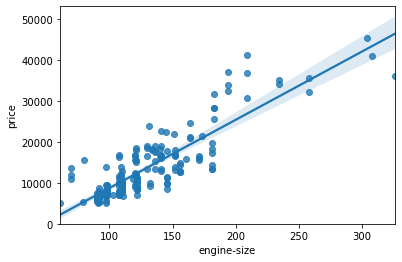

In [46]:
#'engine-size' as a potential predicator variable of 'price'

#find the scatterplot with fitted line of 'engine-size' and 'price'

sns.regplot(x='engine-size', y = 'price', data = df)
plt.ylim(0,)

In [47]:
#find the correlation btw 'engine-size' and 'price'

df[['engine-size', 'price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


(0.0, 47711.9589921623)

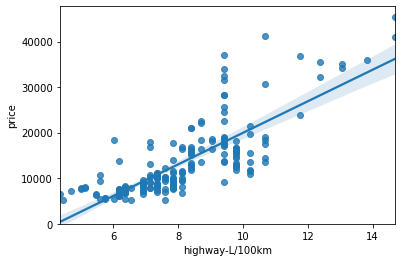

In [48]:
#'highway-L/100km' as a potential predicator variable of 'price'

#find the scatterplot with fitted line of 'highway-L/100km' and 'price'

sns.regplot(x='highway-L/100km', y = 'price', data = df)
plt.ylim(0,)

In [49]:
#find the correlation btw 'highway-L/100km' and 'price'

df[['highway-L/100km', 'price']].corr()

,highway-L/100km,price
highway-L/100km,1.000000,0.801118
price,0.801118,1.000000


## WEAK LINEAR RELATIONSHIP

(0.0, 47414.1)

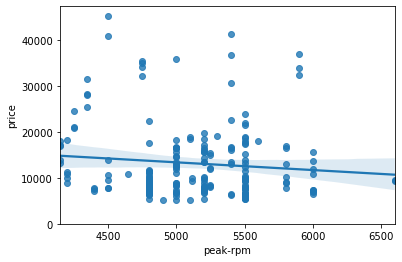

In [50]:
#'peak-rpm' as a potential predicator variable of 'price'

#find the scatterplot with fitted line of 'peak-rpm' and 'price'

sns.regplot(x='peak-rpm', y = 'price', data = df)
plt.ylim(0,)

In [51]:
#find the correlation btw 'peak-rpm' and 'price'

df[['peak-rpm', 'price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101542
price,-0.101542,1.000000


(0.0, 47414.1)

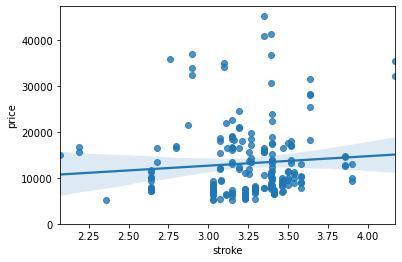

In [52]:
#'stroke' as a potential predicator variable of 'price'

#find the scatterplot with fitted line of 'stroke' and 'price'

sns.regplot(x='stroke', y = 'price', data = df)
plt.ylim(0,)

In [53]:
#find the correlation btw 'stroke' and 'price'

df[['stroke', 'price']].corr()

,stroke,price
stroke,1.000000,0.082267
price,0.082267,1.000000


## ANALYZING CATEGORICAL VARIABLE

In [54]:
df['body-style']

0      convertible
1      convertible
2        hatchback
3            sedan
4            sedan
          ...     
200          sedan
201          sedan
202          sedan
203          sedan
204          sedan
Name: body-style, Length: 201, dtype: object

<AxesSubplot:xlabel='body-style', ylabel='price'>

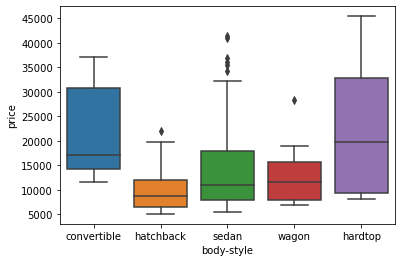

In [55]:
#'body-style' as a potential predicator variable of 'price'

#find the boxplot of 'body-style' and 'price'

sns.boxplot(x= 'body-style', y='price', data=df)

<AxesSubplot:xlabel='engine-location', ylabel='price'>

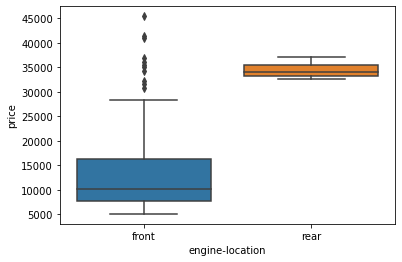

In [56]:
#'engine-location' as a potential predicator variable of 'price'

#find the boxplot of 'engine-location' and 'price'

sns.boxplot(x='engine-location', y='price', data=df)

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

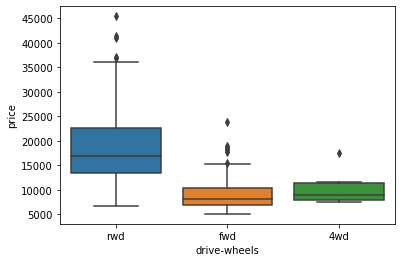

In [57]:
#drive-wheels as a potential predicator variable of 'price'

#find the boxplot of 'drive-wheels' and 'price'

sns.boxplot(x='drive-wheels', y='price', data=df)

## DESCRIPTIVE STATISTICAL ANALYSIS

In [58]:
#apply 'value_counts' method to 'drive-wheels', covert the result to a dataframe and save it to a variable
#rename the column from 'drive-wheels' to 'value-counts'
#rename the index to 'drive-wheels'

drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()

drive_wheels_counts.rename(columns={'drive-wheels':'value-counts'}, inplace=True)

drive_wheels_counts.index.name = 'drive-wheels'

drive_wheels_counts

,value-counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [59]:
#apply 'value_counts' method to 'engine-location'
#covert the result to a dataframe and save it to a variable
#rename the column from 'engine-location' to 'value-counts'
#rename the index to 'drive-wheels'

engine_location_counts = df['engine-location'].value_counts().to_frame()

engine_location_counts.rename(columns={'engine-location':'value-counts'}, inplace =True)

engine_location_counts.index.name = 'engine-location'

engine_location_counts

,value-counts
engine-location,
front,198
rear,3


## BASIC GROUPING

In [60]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [61]:
#select the columns 'drive-wheels', 'body-style' and 'price', then assign it to the variable "df_group_one"

df_group_one = df[['drive-wheels', 'body-style', 'price']]

In [62]:
#calculate the average price of each of the different categories of data
#that is, group by 'body-style' and 'drive-wheels'

df_group_one = df_group_one.groupby(['body-style', 'drive-wheels'], as_index=False).mean()
df_group_one

,body-style,drive-wheels,price
0,convertible,fwd,11595.000000
1,convertible,rwd,23949.600000
2,hardtop,fwd,8249.000000
3,hardtop,rwd,24202.714286
4,hatchback,4wd,7603.000000
5,hatchback,fwd,8396.387755
6,hatchback,rwd,14337.777778
7,sedan,4wd,12647.333333
8,sedan,fwd,9811.800000
9,sedan,rwd,21711.833333


In [63]:
#for easier visualization of grouped data, leave 'drive-wheels' as rows and pivot 'body-style' as the column of the table


grouped_pivot = df_group_one.pivot(index='drive-wheels', columns = 'body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [64]:
#fill missing data with 0

grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [65]:
#Use the "groupby" function to find the average "price" of each car based on "body-style"

df_group_two = df[['body-style', 'price']]

df_group_two = df_group_two.groupby(['body-style'], as_index = False).mean()

grouped_pivot_one = df_group_two.pivot(index = None, columns ='body-style')

grouped_pivot_one = grouped_pivot_one.fillna(0)

grouped_pivot_one

price                                              
body-style convertible  hardtop    hatchback         sedan     wagon
0              21890.5      0.0     0.000000      0.000000      0.00
1                  0.0  22208.5     0.000000      0.000000      0.00
2                  0.0      0.0  9957.441176      0.000000      0.00
3                  0.0      0.0     0.000000  14459.755319      0.00
4                  0.0      0.0     0.000000      0.000000  12371.96

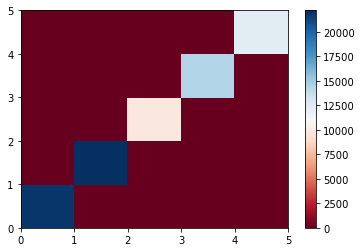

In [66]:
#use the heat map to visualize the relationship between 'body-style' and 'price'

plt.pcolor(grouped_pivot_one, cmap='RdBu')
plt.colorbar()

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'convertible'),
  Text(1.5, 0, 'hardtop'),
  Text(2.5, 0, 'hatchback'),
  Text(3.5, 0, 'sedan'),
  Text(4.5, 0, 'wagon')])

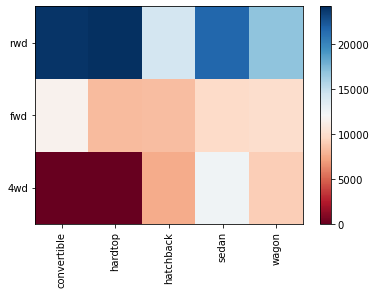

In [67]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap = 'RdBu')
plt.colorbar(im)

#labels
row_labels = grouped_pivot.columns.levels[1]
col_labels= grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor = False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor = False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

CORRELATION AND CAUSATION

In [68]:
#calculate the Person correlation coefficient and P-value of 'wheel-base' and 'price'
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])

print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270733218e-20


In [69]:
#calculate the Person correlation coefficient and P-value of 'length' and 'price'
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])

print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.6906283804483642  with a P-value of P = 8.016477466158759e-30


In [70]:
#calculate the Pearson correlation coefficient and P-value of 'width' and 'price'

pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])

print("The Pearson Correlation Coefficient is", pearson_coef," with P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.7512653440522672  with P-value of P = 9.20033551048217e-38


In [71]:
#calculate the Pearson Coefficient and P-value of 'curb-weight' and 'price'

pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])

print("The Pearson Coefficient is", pearson_coef, " with P-value of P =", p_value)

The Pearson Coefficient is 0.8344145257702845  with P-value of P = 2.189577238893816e-53


In [72]:
#calculate the Pearson Coefficient and P-value of 'bore' and 'price'

pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])

print("The Pearsons Coefficient is", pearson_coef, " with P-value of P = ", p_value)

The Pearsons Coefficient is 0.5431537659807733  with P-value of P =  8.051208825441245e-17


## IMPORTANT VARIABLES FOR PREDICTING PRICE

**CONTINUOUS NUMERIACAL VARIABLES**

curb-weight,
width,
length,
bore,
wheel-base,
engine-size,
highway-L/100km,

horsepower
city-mpg

## ANOVA

In [73]:
#select 'drive-wheels' and 'price' and groupby 'drive-wheels'

grouped_three = df[['drive-wheels', 'price']]
grouped_three = grouped_three.groupby(['drive-wheels'])
grouped_three.head()

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
6,fwd,17710.0
7,fwd,18920.0
8,fwd,23875.0
10,rwd,16430.0


In [74]:
#obtain the prices for '4wd' using the 'get_group' method

grouped_three.get_group('4wd')['price']

4      17450.0
140     7603.0
144     9233.0
145    11259.0
148     8013.0
149    11694.0
154     7898.0
155     8778.0
Name: price, dtype: float64

In [75]:
#ANOVA for 4wd, fwd, rwd

f_val, p_val = stats.f_oneway(grouped_three.get_group('4wd')['price'], grouped_three.get_group('fwd')['price'], grouped_three.get_group('rwd')['price'])

print("ANOVA results: F=", f_val, ", P =", p_val)


ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


In [76]:
#analyse the F-score and P-value of the three groups (4wd, fwd, rwd) separately
#4wd and fwd

f_val, p_value = stats.f_oneway(grouped_three.get_group('4wd')['price'], grouped_three.get_group('fwd')['price'])

print("ANOVA values: F=", f_val, ", P=", p_val)

ANOVA values: F= 0.665465750252303 , P= 3.3945443577151245e-23


In [77]:
#4wd and rwd

f_val, p_val = stats.f_oneway(grouped_three.get_group('4wd')['price'], grouped_three.get_group('rwd')['price'])

print("ANOVA values: F=", f_val, ", P=", p_val)

ANOVA values: F= 8.580681368924756 , P= 0.004411492211225333


In [78]:
#fwd and rwd

f_val, p_val = stats.f_oneway(grouped_three.get_group('fwd')['price'], grouped_three.get_group('rwd')['price'])

print("ANOVA values: F=", f_val, ", P=", p_val)

ANOVA values: F= 130.5533160959111 , P= 2.2355306355677845e-23


## IMPORTANT VARIABLES FOR PREDICTING PRICE

**CATEGORICAL VARIABLES**

drive-wheels


## MODEL DEVELOPMENT

## LINEAR REGRESSION

In [79]:
#create the linear regression object

lm = LinearRegression()

In [80]:
#create a linear function "Yhat = a+bX" with 'highway-L/100km' as the predictor variable and the 'price' as the response variable
#aka - train the model using "highway-L/100km" as independent variable and "price" as dependent variable

X = df[['highway-L/100km']]
Y = df['price']

In [81]:
#fit the linear model using 'highway-L/100km'

lm.fit(X,Y)

LinearRegression()

In [82]:
#output a prediction

Yhat = lm.predict(X)

In [83]:
#output slope (b)

lm.coef_

array([3458.68511314])

Create an object for linear regression, train the model using 'engine-size' as the independent variable and 'price' as the dependent variable.

In [84]:
#create an object for linear regression

lm1 = LinearRegression()

#train the model using 'engine-size' as the independent variable and 'price' as the dependent variable

X1 = df[['engine-size']]
Y = df['price']

lm1.fit(X1,Y)

#output a prediction

Yhat = lm1.predict(X)
Yhat[0:5]

#output intercept and slope

lm1.intercept_

lm1.coef_

print("Intercept=", lm1.intercept_ ,"slope=", lm1.coef_ )


#EQUATION OF PREDICTED LINE
# Yhat = -7963.3 + 166.9X1

Intercept= -7963.338906281046 slope= [166.86001569]


## MULTIPLE LINEAR REGRESSION

In [85]:
#develop a model using these variables ('horsepower', 'curb-weight', 'engine-size', 'highway-L/100km') as the predictor variable and 'price' as the response variable
lm2 = LinearRegression()

Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']]
df['price']

lm2.fit(Z, df['price'])

LinearRegression()

In [86]:
lm2.predict(Z)[0:5]


array([14055.18192433, 14055.18192433, 18643.05058857, 10759.40130978,
       16667.53138368])

In [87]:
lm2.intercept_

-14382.161315163663

In [88]:
lm2.coef_

array([ 36.76149419,   3.50153554,  85.32658561, 498.91963877])

In [89]:
#linear function

#price = -14382.2 + 36.8(horsepower) + 3.5(curb-weight) + 85.3(engine-size) + 498.9(highway-L/100km)

Create and train a multiple Linear Regression model 'lm3' where the response variable is 'price', and the predictor variable is 'normalized-losses' and 'highway-l/100km'.


In [90]:
#create and train a multiple Linear Regression model 'lm3' where the response variable is 'price', and the predictor variable is 'normalized-losses' and 'highway-l/100km'

lm3 = LinearRegression()

M= df[['normalized-losses', 'highway-L/100km']]
Y = df['price']

lm3.fit(M,Y)

lm3.predict(M)

lm3.intercept_

lm3.coef_

print("Intercept=", lm3.intercept_, "and slope=", lm3.coef_)

#equation of predicted line
#Yhat = -14340.9 -2.9e+00('normalized-losses') + 3.5e+03('highway-L/100km')

Intercept= -14340.935762266614 and slope= [-2.86467994e+00  3.46770737e+03]


# MODEL EVALUATION USING VISUALIZATION

SIMPLE LINEAR REGRESSION PLOT

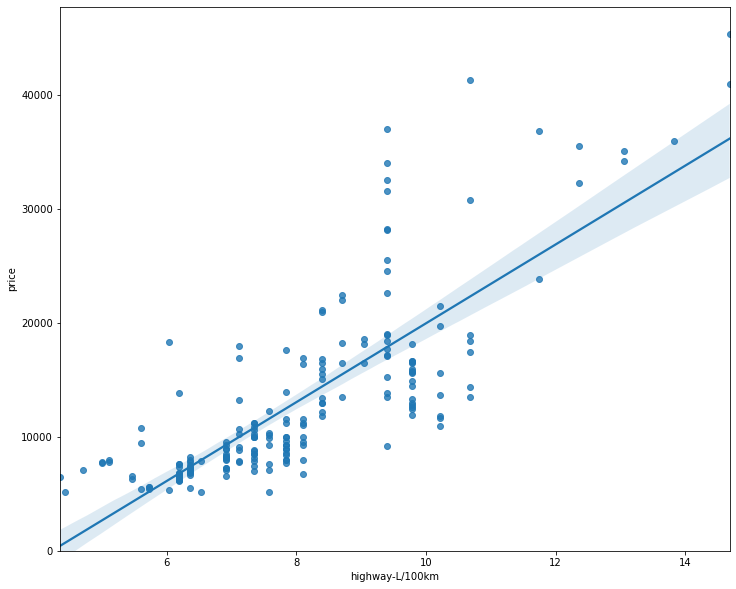

In [91]:
#visualize 'highway-L/100km' as a potential predictor variablr of 'price'
width = 12
height = 10

#define the size of the figure
plt.figure(figsize=(width,height))

sns.regplot(x='highway-L/100km', y= 'price', data = df)
plt.ylim(0,)
plt.show()

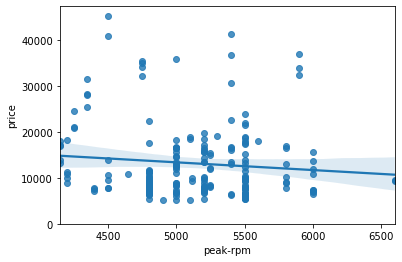

In [92]:
#regression plot for 'peak-rmp'

sns.regplot(x='peak-rpm', y='price', data=df)
plt.ylim(0,)
plt.show()

In [93]:
#give the regression plots above, is 'peak-rpm' or 'highway-L/100km' more strongly correlated with 'price'?

a= df[['peak-rpm', 'highway-L/100km', 'price']].corr()

print("Highway-L/100km is strongly correlated with price than peak-rpm")

a

Highway-L/100km is strongly correlated with price than peak-rpm


,peak-rpm,highway-L/100km,price
peak-rpm,1.000000,0.017736,-0.101542
highway-L/100km,0.017736,1.000000,0.801118
price,-0.101542,0.801118,1.000000


RESIDUAL PLOT

'Randomly spread out residuals' means that the variance is constant, and thus the linear model is a good fit for this data.

The residuals are not ramdomly scattered around the x-axis. Therefore, a non-linear model is a good fit


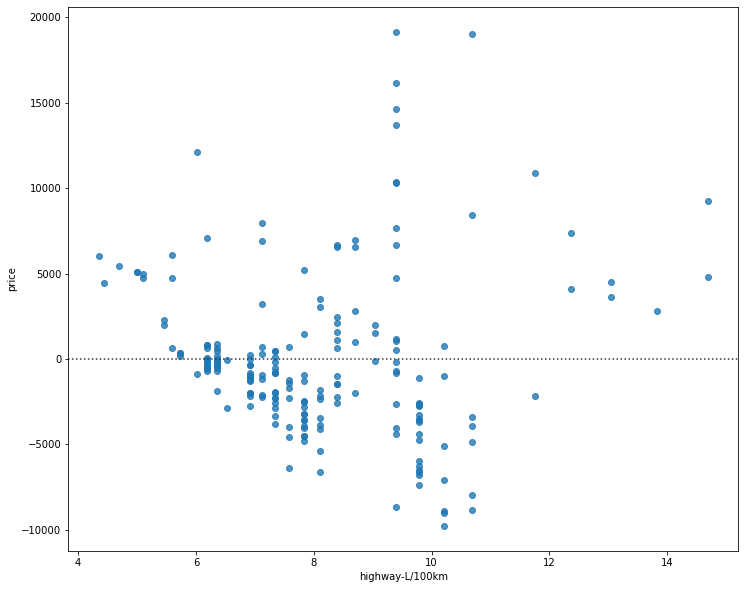

In [94]:
plt.figure(figsize=(12,10))
sns.residplot(x= 'highway-L/100km', y='price', data=df)

print("The residuals are not ramdomly scattered around the x-axis. Therefore, a non-linear model is a good fit")

MULTIPLE LINEAR REGRESSION (MLR) PLOT

We can visualize a model for MLR with 'regplot' or 'residplot'. 

One way to look at the fit of the model is by looking at the distribution plot. We can look at the distribution of the 'fitted values' and compare it to the distribution of the 'actual values'.

The fitted values(red) are reasonably close to the actual values(blue) since the two distributions overlap a bit. However, there is definitely some room for improvement.


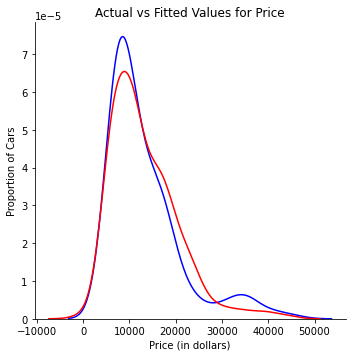

In [95]:
#From the multiple linear regression execise above, look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.
Y_hat =lm2.predict(Z)

ax2= sns.displot(x= 'price', data = df, kind='kde', color='b')
sns.kdeplot(Y_hat, color='r', ax=ax2)

plt.xlabel('price(in dollars)')

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')


print("The fitted values(red) are reasonably close to the actual values(blue) since the two distributions overlap a bit. However, there is definitely some room for improvement.")


## POLYNOMIAL REGRESSION AND PIPLINES

# Polynomial Regression

In [96]:
#define the function to plot the 

def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')
    
    plt.show()
    plt.close()


In [97]:
#define the variables

x = df['highway-L/100km']
y = df['price']

In [98]:
#fit the polynomial using 'polyfit'. Use a polynomial of the third order (cubic)

f= np.polyfit(x,y,3)

In [99]:
#use 'poly1d' to display the polynomial function. With this function, there is no need for 'lm.coef_' and 'lm.intercept_'
p=np.poly1d(f)

print(p)

       3         2
-23.4 x + 923.6 x - 7083 x + 2.152e+04


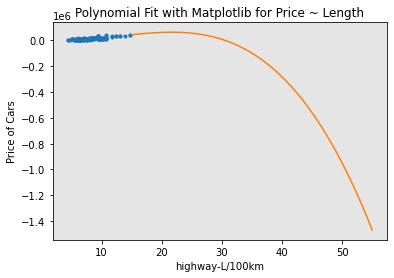

In [100]:
#plot function

PlotPolly(p, x, y, 'highway-L/100km')

Based on the defunct 'highway-mpg', we saw that this polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points.

However, I am unable to tell the same for 'highway-L/100km'.

In [101]:
#create 11 order polynomial model with the variables x and y from the above

g=np.polyfit(x,y,11)

q=np.poly1d(g)

print(q)

          11          10         9         8             7
0.003545 x  - 0.4733 x  + 26.87 x - 870.3 x + 1.803e+04 x
              6             5             4            3             2
 - 2.523e+05 x + 2.441e+06 x - 1.637e+07 x + 7.47e+07 x - 2.213e+08 x + 3.832e+08 x - 2.943e+08


# Multivariate Polynomial

Lets perform a polynomial transformation on multiple features

In [102]:
#create a polynomial features object of two degree

pr=PolynomialFeatures(degree=2)
pr


PolynomialFeatures()

In [103]:
Z_pr=pr.fit_transform(Z)

In [104]:
#In the original data, there are 201 samples and 4 features.

Z.shape

(201, 4)

In [105]:
#After the transformation, there are 201 samples and 15 features.
Z_pr.shape

(201, 15)

# PIPELINE

In [106]:
#Create a list of tuples including the name of the model/estimator and its corresponding constructor

Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]

In [107]:
#input the list as an argument to the pipeline constructor

pipe=Pipeline(Input)

pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [108]:
#convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs. Then, can normalize the data, perform a transform and fit the model simultaneously

Z=Z.astype(float)

pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [109]:
#normalize the data, perform a transform and produce a prediction simultaneously.

ypipe=pipe.predict(Z)
ypipe[0:4]

array([12396.25072589, 12396.25072589, 18427.88376418,  9983.16028344])

Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.

In [110]:
#pipeline that standardizes the data

Input=[('scale', StandardScaler()), ('model', LinearRegression())]
pipe=Pipeline(Input)

#prediction using a linear regression model using the features Z and target y

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:4]

array([14055.18192433, 14055.18192433, 18643.05058857, 10759.40130978])

# MEASURES FOR IN-SAMPLE EVALUATION

Model 1: Simple Linear Regression

In [111]:
#highway_L/100km_fit
lm.fit(X,Y)

#calculate R squared
print("The R squared is: ", lm.score(X,Y))

The R squared is:  0.6417894513258818


We can say that ~64.178% of the variation of the price is explained by this simple linear model "highway_L/100km_fit"

In [112]:
#find mean squared error

Yhat=lm.predict(X)

mse= mean_squared_error(df['price'], Yhat)
print("The mean squared error of price and predicted value is: ", mse)

The mean squared error of price and predicted value is:  22510543.777085222


Model 2: Multiple Linear Regression

In [113]:
#multi_fit

lm2.fit(Z,y)

#calculate R square

print("The R squared is:", lm2.score(Z, y))

The R squared is: 0.8118544998135149


We can say that ~81.185% of the variation of the price is explained by this multiple linear model "multi_fit"

In [114]:
#find the mean squared error

Y_predict_multifit= lm2.predict(Z)

print("The mean square error of the actual and predicted price is:", mean_squared_error(y, Y_predict_multifit))

The mean square error of the actual and predicted price is: 11823374.64400718


Model 3: Polynomial Regression

In [115]:
#apply the function r2_score to get the value of R squared

Y_predict_polyfit = p(x)

r_squared=r2_score(y, p(x))
print("The R squared is:", r_squared)


The R squared is: 0.6753581660812171


We can say that ~67.536% of the variation of the price is explained by this multiple linear model "polyfit_fit"

In [116]:
#find the mean squared error
Y_predict_polyfit = p(x)

print("The mean square error of the actual and predicted price is: ", mean_squared_error(y, p(x)))

The mean square error of the actual and predicted price is:  20401030.180019397


## PREDICTION AND DECISION MAKING